In [1]:
#Import data and python packages
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)


In [2]:
#gettinng current working directory
import os
os.getcwd()

'C:\\Users\\fpalash\\Desktop\\R_and_Kaggle\\Python\\PRACTICE\\ML\\Logistic\\Titanic_Model'

In [5]:
#getting training and testing data
titanic_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
#basic info
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
test_df.head(5)
#please notice that target variable is missing in test data 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
#checking missing value is the df
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#we can have null values as percentage of total observations to make it more informative
titanic_df.isnull().sum()/titanic_df.shape[0]
#if more than 40-50 % values are missing there's no point keeping that variable, so we will ignore cabin variable in our model
#be careful 0 values are not always missing value ex: fashion spend of a customer

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

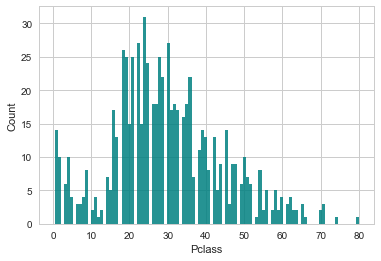

In [23]:
#let's see distribution of age variable to make it more informative
ax = titanic_df['Age'].hist(bins=100, color = 'teal', alpha = 0.85)
ax.set(xlabel = 'Pclass', ylabel = 'Count')
plt.show()
# Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. 
# To deal with this, we'll use the median to impute the missing values.

In [32]:
#let's check median and avergae value to validate our hypothesis
#we are using loc instead of iloc because we are using label to define column Age. When we use column number we use iloc
median = titanic_df.loc[:,'Age'].median()
avg = titanic_df.loc[:,'Age'].mean()
print(median)
print(avg)
#clear indication that taking mean will skew the age to old age variables

28.0
29.69911764705882


In [33]:
#minor missing values in embarked column
# proportion of "Embarked" missing
round(2/len(titanic_df["PassengerId"]),4)
# missing values are so less that we can just impute the port where maximum passengers embarked

0.0022

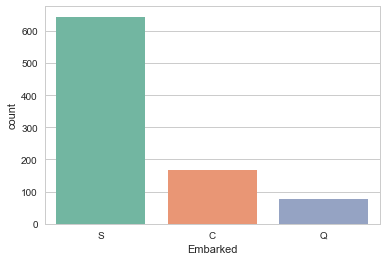

In [38]:
sns.countplot(x='Embarked',data=titanic_df,palette='Set2')
plt.show()
#we will impute missing values with S, as observed from below plot

In [39]:
#so final imputation based on our basic EDA goes as
train_data = titanic_df
train_data["Age"].fillna(28, inplace=True)
train_data["Embarked"].fillna("S", inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [42]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#imp
# According to the Kaggle data dictionary, both SibSp and Parch relate to traveling with family. 
# For simplicity's sake (and to account for possible multicollinearity), 
# I'll combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [46]:
## Create categorical variable for traveling alone
# joining two columns as one and using that as an array to use numpy over it

train_data['TravelBuds']=train_data["SibSp"]+train_data["Parch"]
train_data['TravelAlone']=np.where(train_data['TravelBuds'] == 0 , 1, 0)
#where travelBuds is 0 tag it as alone otherwise not alone


In [44]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TravelBuds,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,0


In [47]:
#dropping unwanted columns after above operation
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)
train_data.drop('TravelBuds', axis=1, inplace=True)
#inplace is to indicate replacement, default value is false so it will be copied if we don't use True

In [ ]:
# we will be creating categorical value for Pclass, Sex, and port embarked 
# categorical is not always non numerical variable
# it is basically assigning a set of predefined value to a variable which means the variable will vary only between these pre-defined values

In [49]:
#create categorical variable for Pclass

train2 = pd.get_dummies(train_data, columns=["Pclass"])

# get_dummies convert categorical values to dummy or indicator values,
# number of dummy values created depends on the distinct type of observation in that column
# other than Pclass nothing wil be changed in the original df

train3 = pd.get_dummies(train2, columns=["Embarked"])

# after Pclass changing Embarked
train4=pd.get_dummies(train3, columns=["Sex"])
# this will create Sex_female and Sex_male columns as these are the two distinct values of this column
# we can delete Sex_Female as it basically shows whethere he was male or not

In [51]:
train4.head(2)

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,1,0,0,1,0,0,1,0


In [52]:
# Dropping unwanted columns from our dataset
train4.drop('Sex_female', axis=1, inplace=True)
train4.drop('PassengerId', axis=1, inplace=True)
train4.drop('Name', axis=1, inplace=True)
train4.drop('Ticket', axis=1, inplace=True)
train4.head(3)
#this dataset looks perfect before we move forward

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0


In [53]:
df_final = train4

In [54]:
#applying the same changes to test data before we proceed further
#fare has only one missing value so ipmputing with median
test_df['Age'].fillna(28, inplace = True)
test_df['Fare'].fillna(28, inplace = True)
test_df.drop('Cabin', axis=1, inplace = True)


In [55]:
#everything similar to train data
test_df['TravelBuds']=test_df["SibSp"]+test_df["Parch"]
test_df['TravelAlone']=np.where(test_df['TravelBuds']>0, 0, 1)

test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)
test_df.drop('TravelBuds', axis=1, inplace=True)

test2 = pd.get_dummies(test_df, columns=["Pclass"])
test3 = pd.get_dummies(test2, columns=["Embarked"])

test4=pd.get_dummies(test3, columns=["Sex"])
test4.drop('Sex_female', axis=1, inplace=True)

test4.drop('PassengerId', axis=1, inplace=True)
test4.drop('Name', axis=1, inplace=True)
test4.drop('Ticket', axis=1, inplace=True)
final_test = test4

In [56]:
final_test.head(3)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1


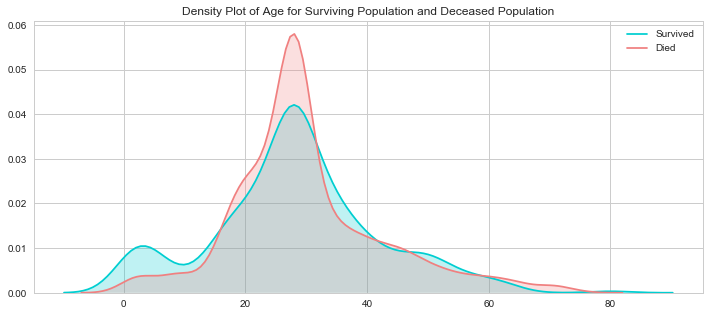

In [61]:
#now comes the intersting part the EDA
#explore age
plt.figure(figsize=(12,5)) #width followed by height
sns.kdeplot(titanic_df['Age'][df_final.Survived == 1], color= 'darkturquoise', shade=True)
sns.kdeplot(titanic_df['Age'][df_final.Survived == 0], color= 'lightcoral', shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

In [ ]:
# we are getting same type of distribution for both survivors and dead people
# but number of children in survivor passenger shows a skew
# The passengers evidently made an attempt to save children by giving them a place on the life rafts.

In [62]:
#  The passengers evidently made an attempt to save children by giving them a place on the life rafts.
df_final['IsMinor'] = np.where(train_data['Age']<= 16,1,0)
final_test['IsMinor'] = np.where(final_test['Age']<= 16,1,0)

In [67]:
df_final.tail()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
886,0,27.0,13.00,1,0,1,0,0,0,1,1,0
887,1,19.0,30.00,1,1,0,0,0,0,1,0,0
888,0,28.0,23.45,0,0,0,1,0,0,1,0,0
889,1,26.0,30.00,1,1,0,0,1,0,0,1,0
890,0,32.0,7.75,1,0,0,1,0,1,0,1,0


Text(0.5,1,'Density Plot of Fare for Surviving Population and Deceased Population')

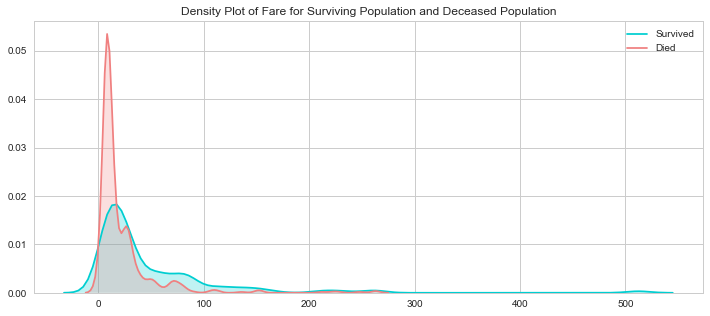

In [69]:
#Let's explore fare of the titanic
plt.figure(figsize=(12,5))
sns.kdeplot(df_final['Fare'][titanic_df.Survived == 1], color = "darkturquoise", shade= True)
sns.kdeplot(df_final['Fare'][titanic_df.Survived == 0], color = "lightcoral", shade= True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')

#because of outlier we can observe that the visualization is not good. let's limit x and then check

<function matplotlib.pyplot.show(*args, **kw)>

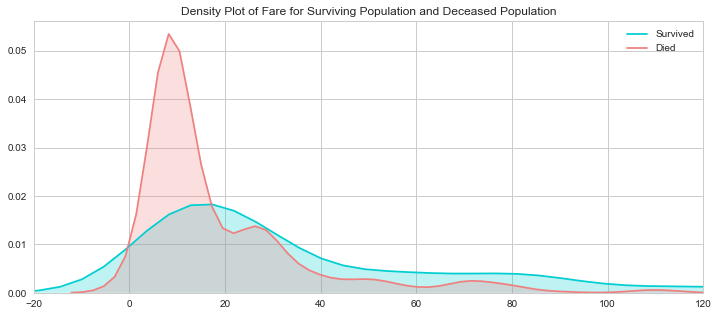

In [72]:
#Let's explore fare of the titanic
plt.figure(figsize=(12,5))
sns.kdeplot(df_final['Fare'][titanic_df.Survived == 1], color = "darkturquoise", shade= True)
sns.kdeplot(df_final['Fare'][titanic_df.Survived == 0], color = "lightcoral", shade= True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')

#because of outlier we can observe that the visualization is not good. let's limit x and then check

plt.xlim(-20,120)
plt.show

In [ ]:
#As the distributions are clearly different for the fares of survivors vs. deceased, 
#it's likely that this would be a significant predictor in our final model. 
#Passengers who paid lower fare appear to have been less likely to survive. 
#This is probably strongly correlated with Passenger Class, which we'll look at next.

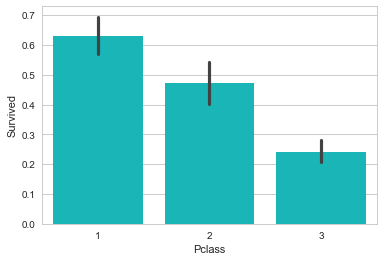

In [74]:
sns.barplot('Pclass','Survived', data=titanic_df, color="darkturquoise")
plt.show()

In [ ]:
#Compare 72 and 74 and we can see they have strong co-relation as they have similar affect on target variable
#so definitely richest people were the safest people


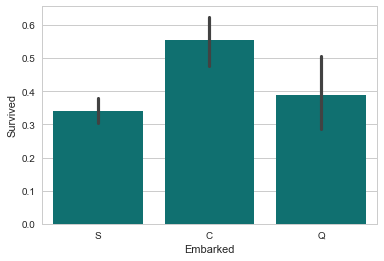

In [75]:
#exploration of embarked port
sns.barplot ('Embarked','Survived', data=titanic_df, color='teal')
plt.show()
# Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. 
# Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. 
# This is probably related to passenger class, 
# or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck). 

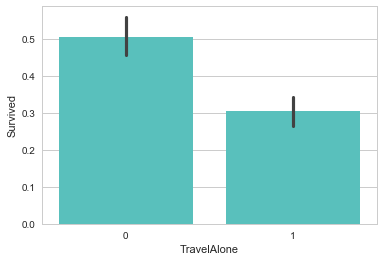

In [76]:
#  Exploration of Traveling Alone vs. With Family 
sns.barplot('TravelAlone', 'Survived', data=df_final, color="mediumturquoise")
plt.show()
# Individuals traveling without family were more likely to die in the disaster than those with family aboard. Given the era, 
# it's likely that individuals traveling alone were likely male.

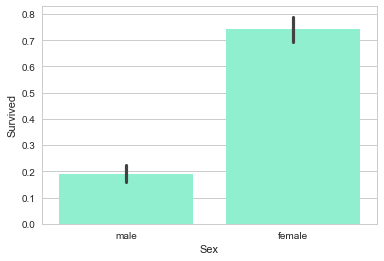

In [77]:
sns.barplot('Sex', 'Survived', data=titanic_df, color="aquamarine")
plt.show()
# clear indication of MeToo :(

In [78]:
#let's move to regression
df_final.head(5)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0


In [79]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X=df_final[cols]
Y=df_final['Survived']

In [80]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.450348
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Mon, 26 Nov 2018   Pseudo R-squ.:                  0.3237
Time:                        16:47:33   Log-Likelihood:                -401.26
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 4.627e-78
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0096      0.007     -1.372      0.170      -0.023       0.004
Fare            0.0018    

In [81]:
#we'll run the model again without Fare and TravelAlone (removed one at a time, results didn't change much. In the end removed both). I also removed "IsMinor" from this regression, as the information provided is redundant to the Age variable.
cols2=["Age", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male"]  
X2=df_final[cols2]
Y=df_final['Survived']

logit_model=sm.Logit(Y,X2)
result=logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.458585
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Mon, 26 Nov 2018   Pseudo R-squ.:                  0.3113
Time:                        16:59:27   Log-Likelihood:                -408.60
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.131e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0158      0.006     -2.602      0.009      -0.028      -0.004
Pclass_1       2.0449      0.

In [84]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X2, Y)

logreg.score(X2, Y)
print("Model's predictive score:  " + str(logreg.score(X2,Y)))

Model's predictive score:  0.7934904601571269


In [ ]:
#we could have donw testing using test set but Survived column is not present in the test file
#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics
#logreg = LogisticRegression()
#logreg.fit(X2, Y)

#X_test = final_test[cols2]
#y_test = final_test['Survived']

#y_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test))

In [85]:
#we will be splitting our training data set to do cross validation
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_final, test_size=0.2)
#re-fit logistic regression on new train sample

cols2=["Age", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male"] 
X3=train[cols2]
Y3=train['Survived']
logit_model3=sm.Logit(Y3,X3)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X3, Y3)
logreg.score(X3, Y3)

0.7823033707865169

In [87]:
from sklearn import metrics
logreg.fit(X3, Y3)

X3_test = test[cols2]
Y3_test = test['Survived']

Y3test_pred = logreg.predict(X3_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X3_test, Y3_test)))


Accuracy of logistic regression classifier on test set: 0.83


In [88]:
# Model's in sample AUC

from sklearn.metrics import roc_auc_score
logreg.fit(X3, Y3)
Y3_pred = logreg.predict(X3)

y_true = Y3
y_scores = Y3_pred
roc_auc_score(y_true, y_scores)

0.7679840726602606

ROC AUC: 0.859


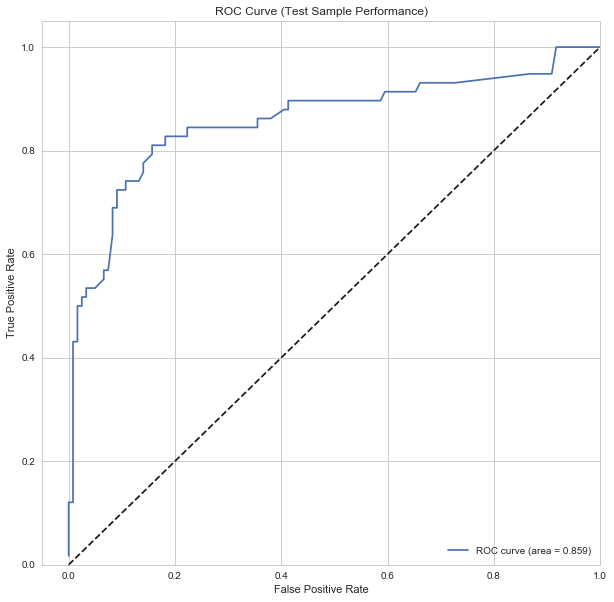

In [89]:
#Visualizing the model's ROC curve (**source for graph code given below the plot)
from sklearn.metrics import roc_curve, auc
logreg.fit(X3, Y3)

y_test = Y3_test
X_test = X3_test
 
# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
 
# Calculate the AUC

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#area that we got is 0.859, ROC = 0.5 is 50% probablity which is a bad score
#Based on my analysis, if you were to be aboard the Titanic, 
#your chances of survival were best if you fit the following criteria:

# Female
# Young
# In First Class
# Embarked in Cherbourg France